# Pengenalan Object Detection

Dalam klasifikasi gambar, kita mengasumsikan hanya ada satu target utama dalam gambar. *Sehingga, model hanya fokus untuk mengidentifikasi kategori target*. 

Namun kenyataannya, satu gambar bisa memiliki beberapa target kategori. Kadang, kita ingin melakukan proses klasifikasi gambar sekaligus mendapatkan posisi spesifik masing-masing target pada gambar. **Inilah yang disebut sebagai tugas deteksi objek.** 

Pada prinsipnya, deteksi objek melibatkan dua tugas utama:

- Melokalisasi satu atau lebih objek dalam gambar.
- Mengklasifikasikan setiap objek dalam gambar.

Proses ini dilakukan dengan menggambar kotak pembatas di sekitar objek dengan kelas yang diprediksi. Ini berarti, sistem tidak hanya memprediksi kelas gambar, tapi juga koordinat kotak pembatas yang bersesuaian dengan objek. Jadi, dalam tugas deteksi objek, kita ingin menemukan semua objek dalam gambar dan menggambar bounding box (kotak pembatas) sekelilingnya.

---
Sekarang kita tahu, untuk membuat suatu sistem deteksi objek, kita harus melakukan dua tugas utama di atas (lokalisasi dan klasifikasi objek) secara bersamaan. 

## Teknik Objek Detection

Selama beberapa dekade, perkembangan teknik deteksi objek berkembang seiring waktu. Untuk lebih memudahkan dalam memahami berbagai teknik deteksi objek, kita akan membaginya menjadi dua kategori. Pertama, kita menyebutnya kategori dengan **pendekatan klasik**. Yang kedua adalah kategori dengan pendekatan **deep learning**. 

---
**Pendekatan Klasik:**
- Haar Cascade
> Salah satu keunggulan teknik ini adalah ia sangat cepat dan efektif. Selain itu, algoritma ini mampu berjalan secara real-time, sehingga memungkinkan kita untuk mendeteksi objek dalam streaming video. Kekurangan dari algoritma ini adalah rentan terhadap hasil prediksi false-positive. Haar Cascade kadang mendeteksi wajah pada gambar padahal sebenarnya tidak ada.
- Histogram of Oriented Gradients
> Ia merupakan metode untuk mendeteksi gambar menggunakan feature descriptor dan algoritma Support Vector Machine Classifier. Feature descriptor adalah representasi gambar yang hanya mengekstrak informasi (fitur) berguna dan mengabaikan informasi yang tidak berguna. Nah, proses ekstraksi informasi ini dilakukan dengan memeriksa tepi dan sudut pada gambar untuk mengidentifikasi perubahan intensitas atau warna gambar.

---
**Pendekatan Deep Learning:**
- R-CNN dan Fast R-CNN
- YOLO (You Only Look Once)
> YOLO lebih dikenal sebagai teknik deteksi objek yang cepat. YOLO menggunakan pendekatan Convolutional Neural Network sederhana dan mampu menghasilkan akurasi serta kecepatan tinggi. Teknik ini memungkinkan kita untuk melakukan deteksi objek secara real-time.

> **Dibandingkan dengan algoritma klasik, algoritma modern seperti pendekatan deep learning mampu memberikan hasil yang lebih akurat.** Namun, sebelum melangkah lebih jauh dengan teknik deep learning untuk deteksi objek, kita akan mengawali studi tentang deteksi objek dengan pendekatan klasik.

Sudah siap untuk lanjut?

### Membuat Detektor Wajah dengan Algoritma Haar Cascade

Pada tahap ini, kita akan membuat detektor wajah dengan algoritma Haar Cascade. Berikut merupakan beberapa tahapan yang akan Anda lakukan dalam proyek ini:

- Pilihlah gambar untuk dideteksi. Karena kita akan mendeteksi wajah, tentu gambar yang dipilih harus ada wajahnya ya!

- Unduh dan load Haar cascades fitur dari repositori [GitHub OpenCV](https://github.com/opencv/opencv/tree/3.4/data/haarcascades). 

- Panggil fungsi classifier untuk mendeteksi wajah.

- Tambahkan kotak deteksi pada area wajah.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = [15,30]

Jika menggunakan IDE atau tools lain, Anda dapat menyesuaikan proses instalasi semua library-nya.

Di sini, contoh gambar yang digunakan adalah [children.jpg](https://pixabay.com/photos/children-siblings-brother-sister-817365/) dan disimpan pada storage session Google Colab. Untuk melihat gambar yang akan kita deteksi, jalankan kode berikut.

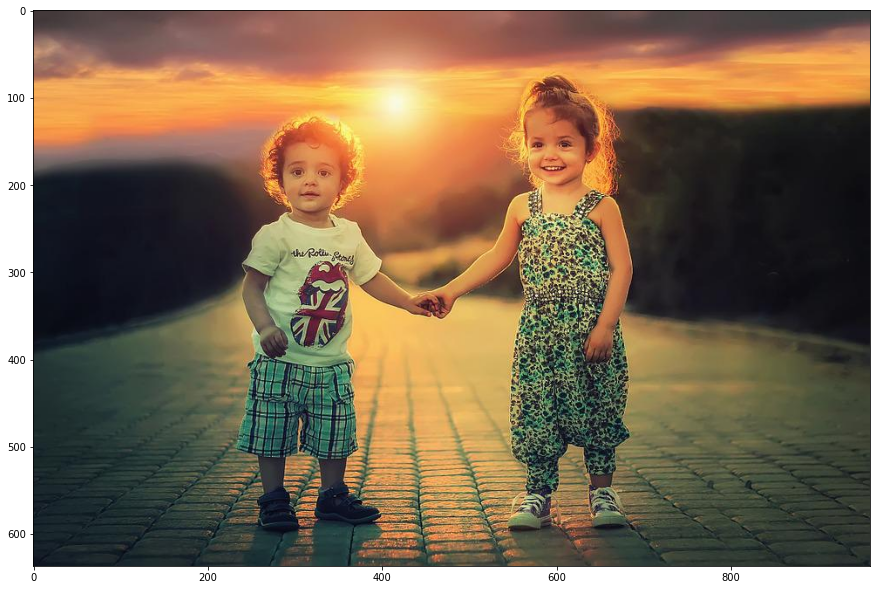

In [3]:
path='/content/children.jpg'
img = cv2.imread(path)
 
#ubah gambar menjadi RGB
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
plt.imshow(imgrgb)
plt.show()

elanjutnya, load Haar cascades fitur dari repositori [GitHub ini](https://github.com/opencv/opencv/tree/3.4/data/haarcascades). Terdapat beberapa file .xml yang merupakan image detector untuk mendeteksi beberapa bagian pada gambar, antara lain:

- Wajah: haarcascade_frontalface_default.xml
- Senyum: haarcascade_smile.xml
- Seluruh tubuh: haarcascade_fullbody.xml
- dsb.

In [4]:
# mendownload file ini untuk deteksi wajah
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -O haarcascade_frontalface_default.xml

--2022-10-16 07:36:30--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2022-10-16 07:36:30 (50.0 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [5]:
# cek file untuk deteksi wajah
!ls

children.jpg  haarcascade_frontalface_default.xml  sample_data


Langkah berikutnya, kita panggil fungsi CascadeClassifier untuk mendeteksi wajah. 


In [8]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
 
path=('/content/children.jpg')
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Selanjutnya, tambahkan kotak deteksi pada area wajah dengan kode berikut.

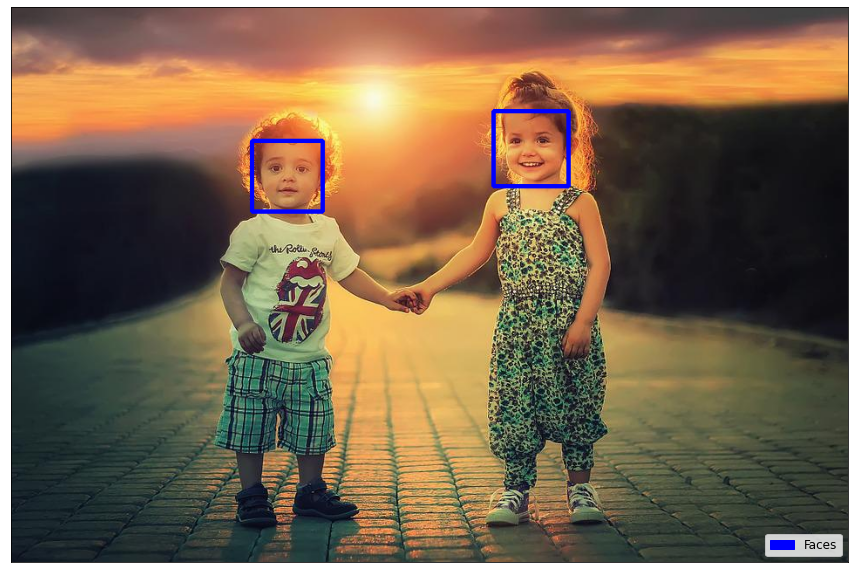

In [9]:
faces = face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:
    img = cv2.rectangle(
        img,          # objek gambar
        (x,y),        # posisi kotak
        (x+w,y+h),    # posisi kotak
        (255,0,0),    # warna kotak
        3             # lebar garis kotak
        )
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
plt.xticks([])
plt.yticks([])
 
# Membuat keterangan label
face_patch = mpatches.Patch(color='blue', label='Faces')
plt.legend(handles=[face_patch], 
           loc='lower right', fontsize=12)
 
# Plot gambar
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Selamat, Anda berhasil membuat deteksi gambar dengan Haar cascade classifier. Apakah Anda ingin mencoba untuk fitur lainnya, misal mendeteksi mata dan senyum? Mari kita coba!

Pertama, load Haar cascades fitur dari repositori [GitHub](https://github.com/opencv/opencv/tree/3.4/data/haarcascades) untuk mendeteksi face, smile dan eyes menggunakan kode berikut.

In [10]:
# Face detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml" -O haarcascade_frontalface_default.xml
 
# Eye detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml" -O haarcascade_eye.xml
 
# Smile detector
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml" -O haarcascade_smile.xml

--2022-10-16 07:42:05--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2022-10-16 07:42:05 (49.4 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-10-16 07:42:05--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

Panggil fungsi cascade classifier dengan menjalankan kode ini:

In [11]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
 
path=('/content/children.jpg')
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Terakhir, tambahkan kotak deteksi pada objek sekaligus labelnya dengan mengimplementasikan kode berikut.

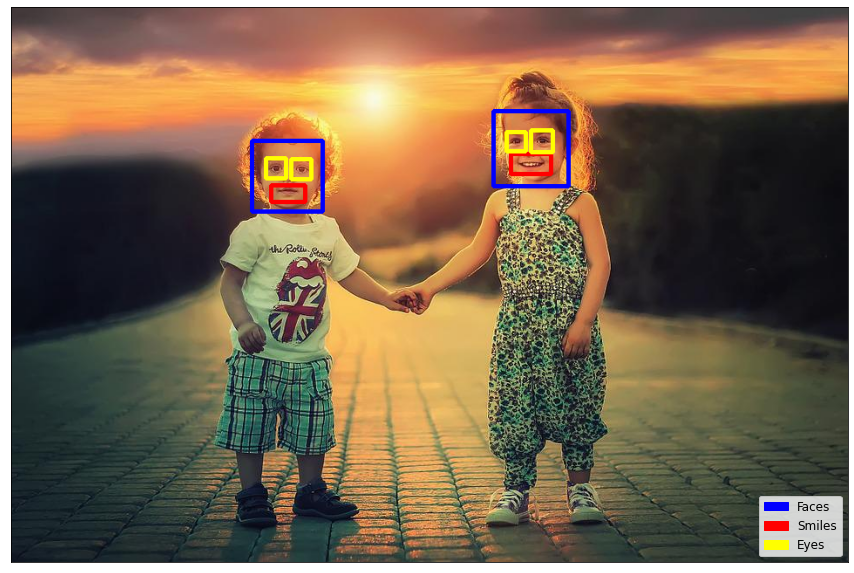

In [12]:
faces =  face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:  
    img = cv2.rectangle(
        img,          # objek gambar
        (x,y),        # posisi awal kotak (horizontal dan vertikal)
        (x+w,y+h),    # posisi kotak dengan penambahan lebar (w) dan tinggi (h)
        (255,0,0),    # warna kotak dalam RGB
        3             # lebar garis kotak
        )
 
    # Mengatur region of interest (ROI) sebagai area target
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
 
    smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=20)
    for(sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,0,255), 3)
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,255), 3)
    
plt.xticks([])
plt.yticks([])
 
face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='red', label='Smiles')
eye_patch = mpatches.Patch(color='yellow', label='Eyes')
plt.legend(handles=[face_patch, smile_patch, eye_patch], 
           loc='lower right', fontsize=12)
 
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Selamat! Anda berhasil membuat multiple object detection dengan fitur Haar cascade. Jika Anda masih penasaran untuk mencoba mendeteksi objek lainnya, jangan ragu untuk mencoba, ya! 